# HIT PREDICTOR

Itzae Flores - Diego Valdés - Tomás Dempster

### Importación librerias y datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
music_genre = pd.read_csv('music_genre.csv')
music_genre.head()

music_prueba = music_genre.copy()

### Limpieza de datos

In [4]:
music_genre.describe().round(2)

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,55888.40,44.22,0.31,0.56,221252.60,0.60,0.18,0.19,-9.13,0.09,0.46
std,20725.26,15.54,0.34,0.18,128671.96,0.26,0.33,0.16,6.16,0.10,0.25
min,20002.00,0.00,0.00,0.06,-1.00,0.00,0.00,0.01,-47.05,0.02,0.00
25%,37973.50,34.00,0.02,0.44,174800.00,0.43,0.00,0.10,-10.86,0.04,0.26
50%,55913.50,45.00,0.14,0.57,219281.00,0.64,0.00,0.13,-7.28,0.05,0.45
75%,73863.25,56.00,0.55,0.69,268612.25,0.82,0.16,0.24,-5.17,0.10,0.65
max,91759.00,99.00,1.00,0.99,4830606.00,1.00,1.00,1.00,3.74,0.94,0.99


Eliminar columnas que no se utilizarán y datos nulos o faltantes en el dataset. Cambiar columna 'popularity' a booleano.

In [5]:
# print cantidad de datos 
print("cantidad de datos antes de limpieza: ", music_genre.shape)

# Eliminar columnas que no se utilizarán
column_not_use = ['key', 'mode', 'obtained_date']
print("columnas que no se utilizaran y se eliminan: ", column_not_use)
music_genre.drop(column_not_use, axis = 1, inplace = True)

# Eliminar datos nulos 
music_genre.dropna(inplace = True)

# Eliminar filas duplicadas
music_genre.drop_duplicates(inplace = True)

# Eliminar filas donde tempo == '?', duration < 0
print("Se eliminan filas donde tempo == '?' y duration menos a 0")
music_genre.drop(music_genre[music_genre['tempo'] == '?'].index, inplace = True)
music_genre.drop(music_genre[music_genre['duration_ms'] < 0].index, inplace = True)

# print cantidad de datos
print("cantidad de datos despues de limpieza: ", music_genre.shape)

# Revisar si cambiamos la condicion de exito
print("La condicion de exito de una cancion es que tenga una popularidad mayor al promedio")

hit_comdition = 60
print(music_genre['popularity'].mean())
music_genre['popularity'] = (music_genre['popularity'] >  hit_comdition).astype(bool)
music_genre.rename(columns = {'popularity': 'hit'}, inplace = True)
print(music_genre['hit'].value_counts())


cantidad de datos antes de limpieza:  (50005, 18)
columnas que no se utilizaran y se eliminan:  ['key', 'mode', 'obtained_date']
Se eliminan filas donde tempo == '?' y duration menos a 0
cantidad de datos despues de limpieza:  (40560, 15)
La condicion de exito de una cancion es que tenga una popularidad mayor al promedio
44.27667652859961
False    34644
True      5916
Name: hit, dtype: int64


Graficos de distribución de canciones por genero musical y popularidad de canciones

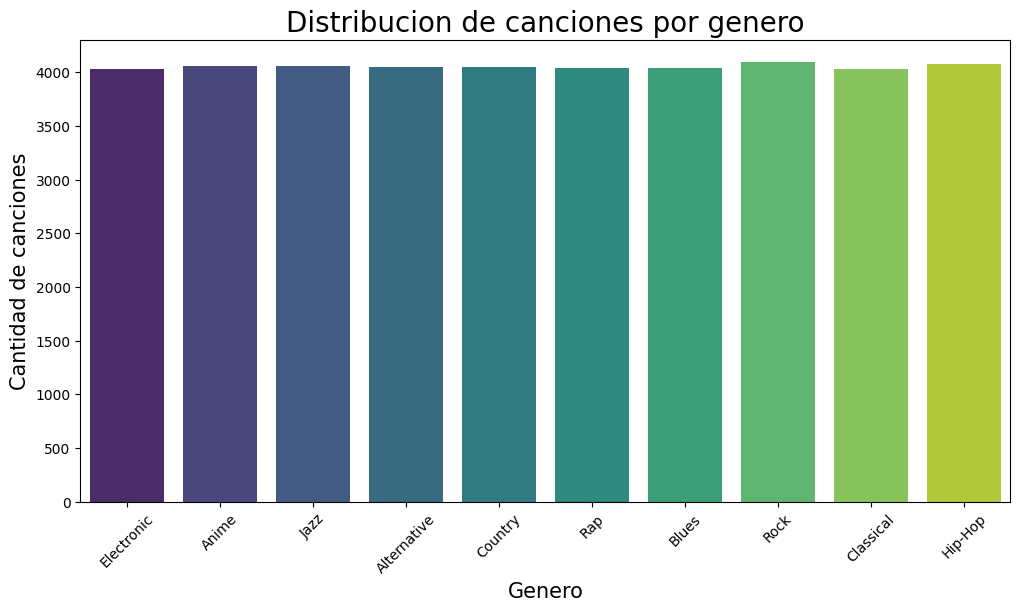

In [6]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'music_genre', data = music_genre, palette = 'viridis')
plt.title('Distribucion de canciones por genero', fontsize = 20)
plt.xlabel('Genero', fontsize = 15)
plt.ylabel('Cantidad de canciones', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

In [7]:
#printear nombres de canciones por sobre el 90% de popularidad

#filtrar popularidad mayor a 90%

music_prueba[music_prueba['popularity'] >= 80].head(20)

#printear primeros 20 nombres

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
105,49721.0,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",96.0,0.15300,0.841,212500.0,0.798,0.000003,C#,0.0618,-4.206,Minor,0.2290,95.948,4-Apr,0.5910,Electronic
1082,43966.0,Tropkillaz,Bola Rebola,84.0,0.22000,0.834,193440.0,0.777,0.006090,F,0.3350,-4.538,Minor,0.0593,129.984,4-Apr,0.8650,Electronic
2328,68314.0,DJ Snake,Let Me Love You,82.0,0.07710,0.652,205947.0,0.713,0.000010,G#,0.1440,-5.311,Major,0.0368,100.023,4-Apr,0.1520,Electronic
15711,66433.0,Joji,Sanctuary,83.0,0.42200,0.552,180019.0,0.650,0.000275,C#,0.3720,-7.199,Major,0.1280,167.78799999999998,4-Apr,0.3160,Alternative
16394,78766.0,Joji,SLOW DANCING IN THE DARK,81.0,0.54400,0.515,209274.0,0.479,0.005980,D#,0.1910,-7.458,Major,0.0261,?,4-Apr,0.2840,Alternative
19995,31035.0,Linkin Park,In the End,80.0,0.01030,0.542,216933.0,0.853,0.000000,D#,0.1080,-6.407,Minor,0.0498,105.256,4-Apr,0.3700,Alternative
22714,55036.0,Lynyrd Skynyrd,Sweet Home Alabama,82.0,0.18100,0.596,283800.0,0.605,0.000331,G,0.0863,-12.145,Major,0.0255,97.79799999999999,4-Apr,0.8860,Country
24968,32309.0,Luke Combs,Beautiful Crazy,82.0,0.67600,0.552,193200.0,0.402,0.000000,B,0.0928,-7.431,Major,0.0262,103.31299999999999,4-Apr,0.3820,Country
25015,66463.0,Future,First Off (feat. Travis Scott),85.0,0.01300,0.734,228367.0,0.683,0.000000,C#,0.2800,-6.105,Major,0.0776,162.03799999999998,4-Apr,0.4450,Rap
25036,79152.0,empty_field,No Brainer,84.0,0.07330,0.552,-1.0,0.760,0.000000,C,0.0865,-4.706,Major,0.3420,135.702,5-Apr,0.6390,Rap


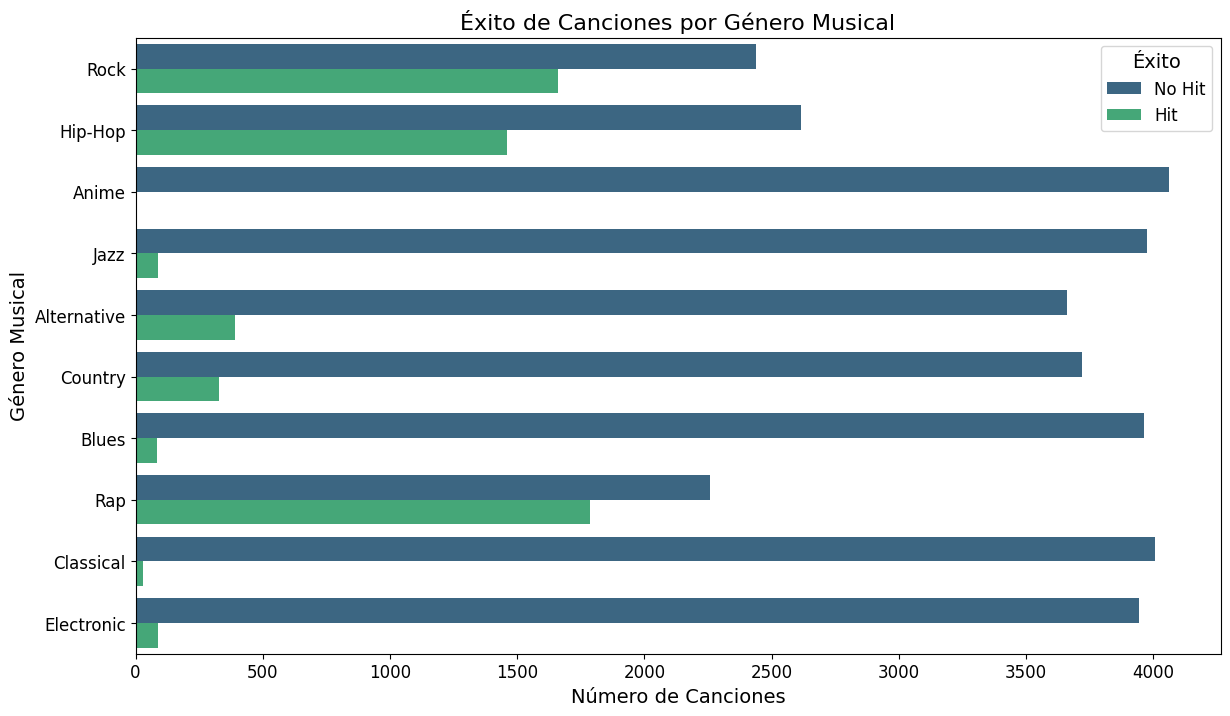

In [8]:
plt.figure(figsize=(14, 8))
sns.countplot(y='music_genre', data=music_genre, hue='hit', order=music_genre['music_genre'].value_counts().index, palette="viridis")
plt.title('Éxito de Canciones por Género Musical', fontsize=16)
plt.xlabel('Número de Canciones', fontsize=14)
plt.ylabel('Género Musical', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Éxito', loc='upper right', labels=['No Hit', 'Hit'], fontsize=12, title_fontsize=14)
plt.show()

Realizar one hot encoding y normalización de columnas numericas con MinMaxScaler.

In [9]:
# Convertir las columnas a numericas
numerical_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
for column in numerical_columns:
    music_genre[column] = pd.to_numeric(music_genre[column], errors='coerce')


# Normalizar las columnas numericas
scaler = MinMaxScaler()
music_genre[numerical_columns] = scaler.fit_transform(music_genre[numerical_columns])

# Convertir las columnas categoricas a strings
categorical_columns = ['music_genre'] # Tambien esta 'artist_name', 'track_name', 'category' pero sgn yo no se deberian de considerar para one hot encoding
for column in categorical_columns:
    music_genre[column] = music_genre[column].astype(str)
    
# one hot encoding para las columnas categoricas
music_genre = pd.get_dummies(music_genre, columns = categorical_columns)

### Analisis de datos

In [10]:
music_genre.describe().round(2)


,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
count,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,...,40560.0,40560.0,40560.0,40560.0,40560.0,40560.0,40560.0,40560.0,40560.0,40560.0
mean,55874.83,0.31,0.54,0.05,0.60,0.18,0.19,0.75,0.08,0.46,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
std,20731.02,0.34,0.19,0.02,0.26,0.33,0.16,0.12,0.11,0.16,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
min,20002.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,37994.75,0.02,0.41,0.04,0.43,0.00,0.09,0.71,0.02,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,55899.50,0.14,0.55,0.05,0.64,0.00,0.12,0.78,0.03,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,73817.50,0.55,0.68,0.06,0.82,0.15,0.24,0.82,0.08,0.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,91759.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
music_genre

,instance_id,artist_name,track_name,hit,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
1,46652.0,Thievery Corporation,The Shining Path,False,0.012751,0.607081,0.045239,0.890804,0.953815,0.115446,...,0,0,0,0,0,1,0,0,0,0
2,30097.0,Dillon Francis,Hurricane,False,0.003072,0.604922,0.044641,0.755562,0.011847,0.529450,...,0,0,0,0,0,1,0,0,0,0
3,62177.0,Dubloadz,Nitro,False,0.025502,0.771157,0.033768,0.700463,0.002540,0.148769,...,0,0,0,0,0,1,0,0,0,0
4,24907.0,What So Not,Divide & Conquer,False,0.004669,0.624352,0.046149,0.587260,0.912651,0.148769,...,0,0,0,0,0,1,0,0,0,0
6,43760.0,Jordan Comolli,Clash,False,0.029016,0.553109,0.044372,0.803648,0.000008,0.097271,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,28408.0,Night Lovell,Barbie Doll,False,0.133534,0.852116,0.049561,0.660391,0.000008,0.289126,...,0,0,0,0,0,0,1,0,0,0
50001,43557.0,Roy Woods,Drama (feat. Drake),True,0.157631,0.700993,0.052728,0.361856,0.000000,0.100300,...,0,0,0,0,0,0,1,0,0,0
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),False,0.005994,0.683722,0.038812,0.763576,0.000000,0.134632,...,0,0,0,0,0,0,1,0,0,0
50003,57944.0,The-Dream,Shawty Is Da Shit,True,0.083434,0.779793,0.055162,0.472054,0.000000,0.097271,...,0,0,0,0,0,0,1,0,0,0


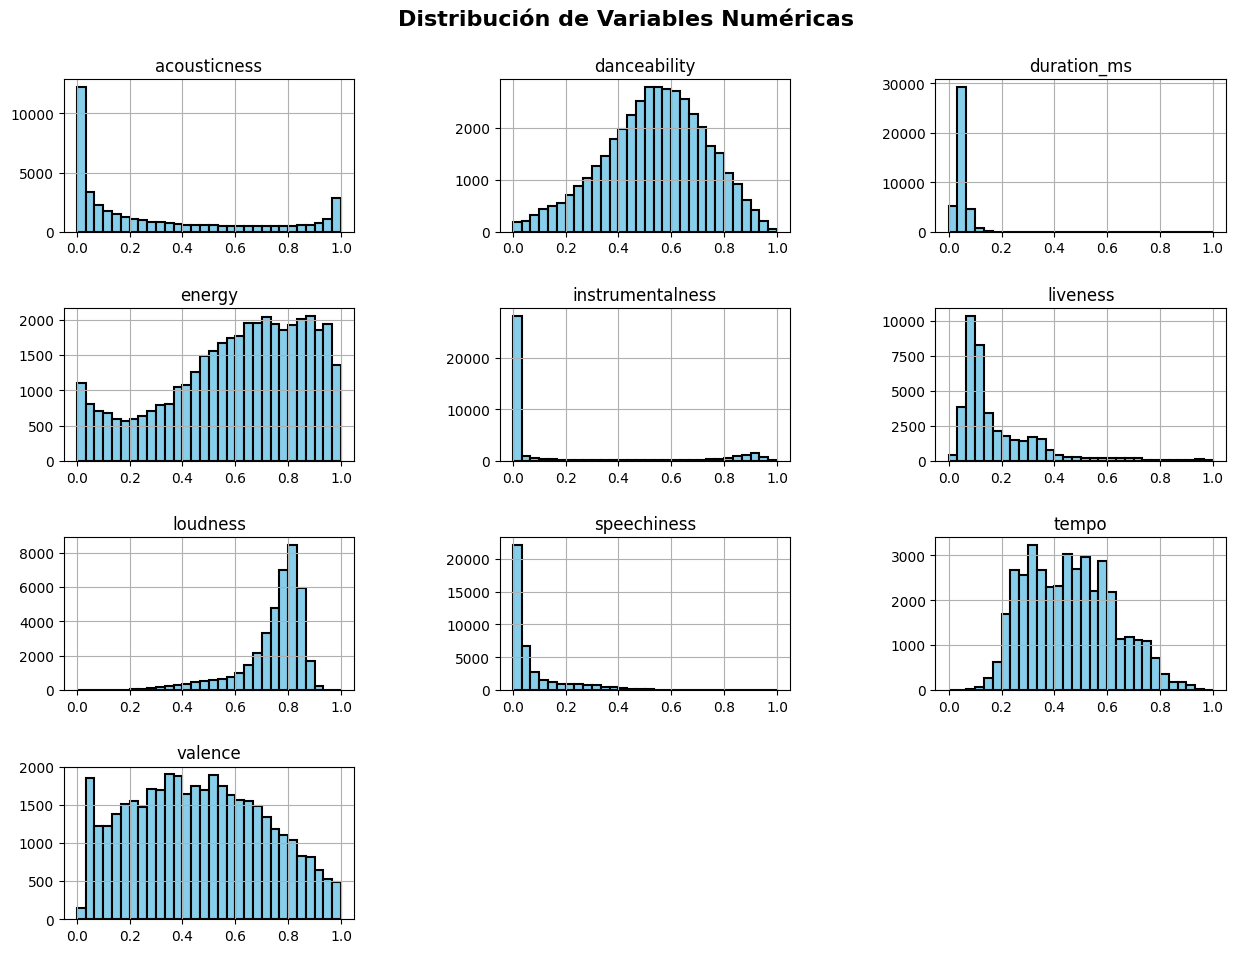

In [12]:
music_genre[numerical_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black', linewidth=1.5)
plt.suptitle('Distribución de Variables Numéricas', fontsize=16, y=1.02, weight='bold')
plt.subplots_adjust(top=0.95, hspace=0.5, wspace=0.5)
plt.show()

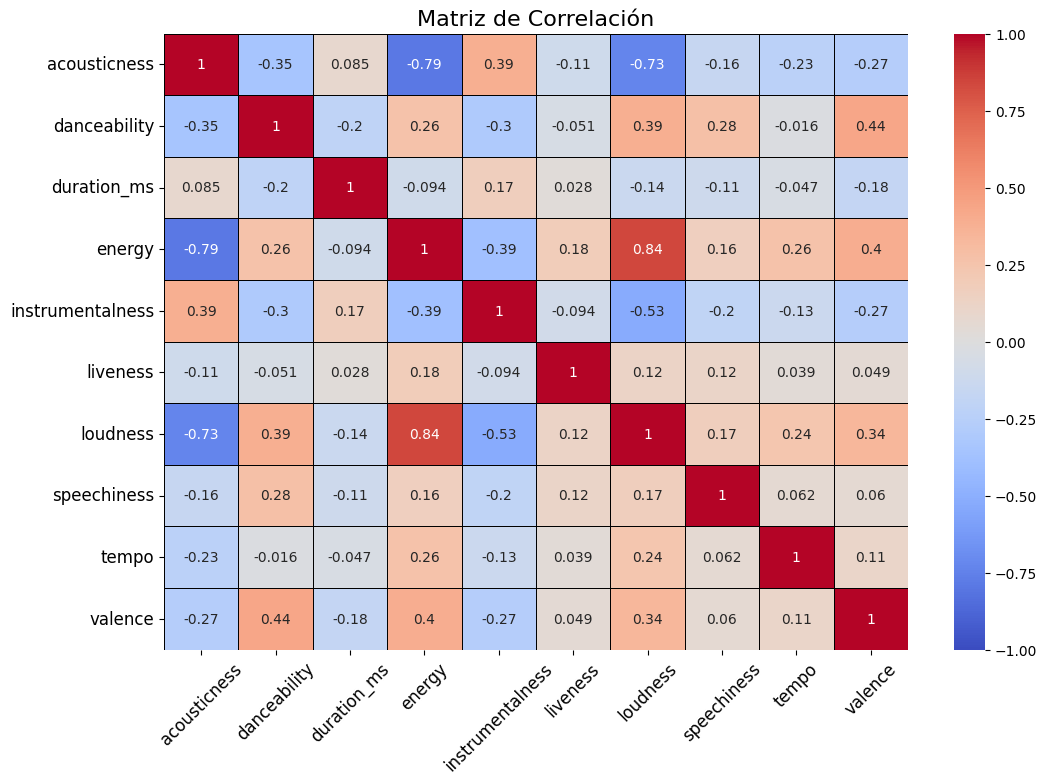

In [13]:
corr_matrix = music_genre[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Se realiza fischer score para ver el peso de las variables en la predicción de si es hit o no. 

               Specs         Score
7   instrumentalness  3.874079e+06
9           loudness  1.348154e+06
5        duration_ms  5.232178e+05
2         track_name  2.897579e+05
10       speechiness  2.483517e+05
11             tempo  1.249317e+05
4       danceability  7.617277e+04
6             energy  3.160134e+04
3       acousticness  2.780655e+04
12           valence  2.448335e+04


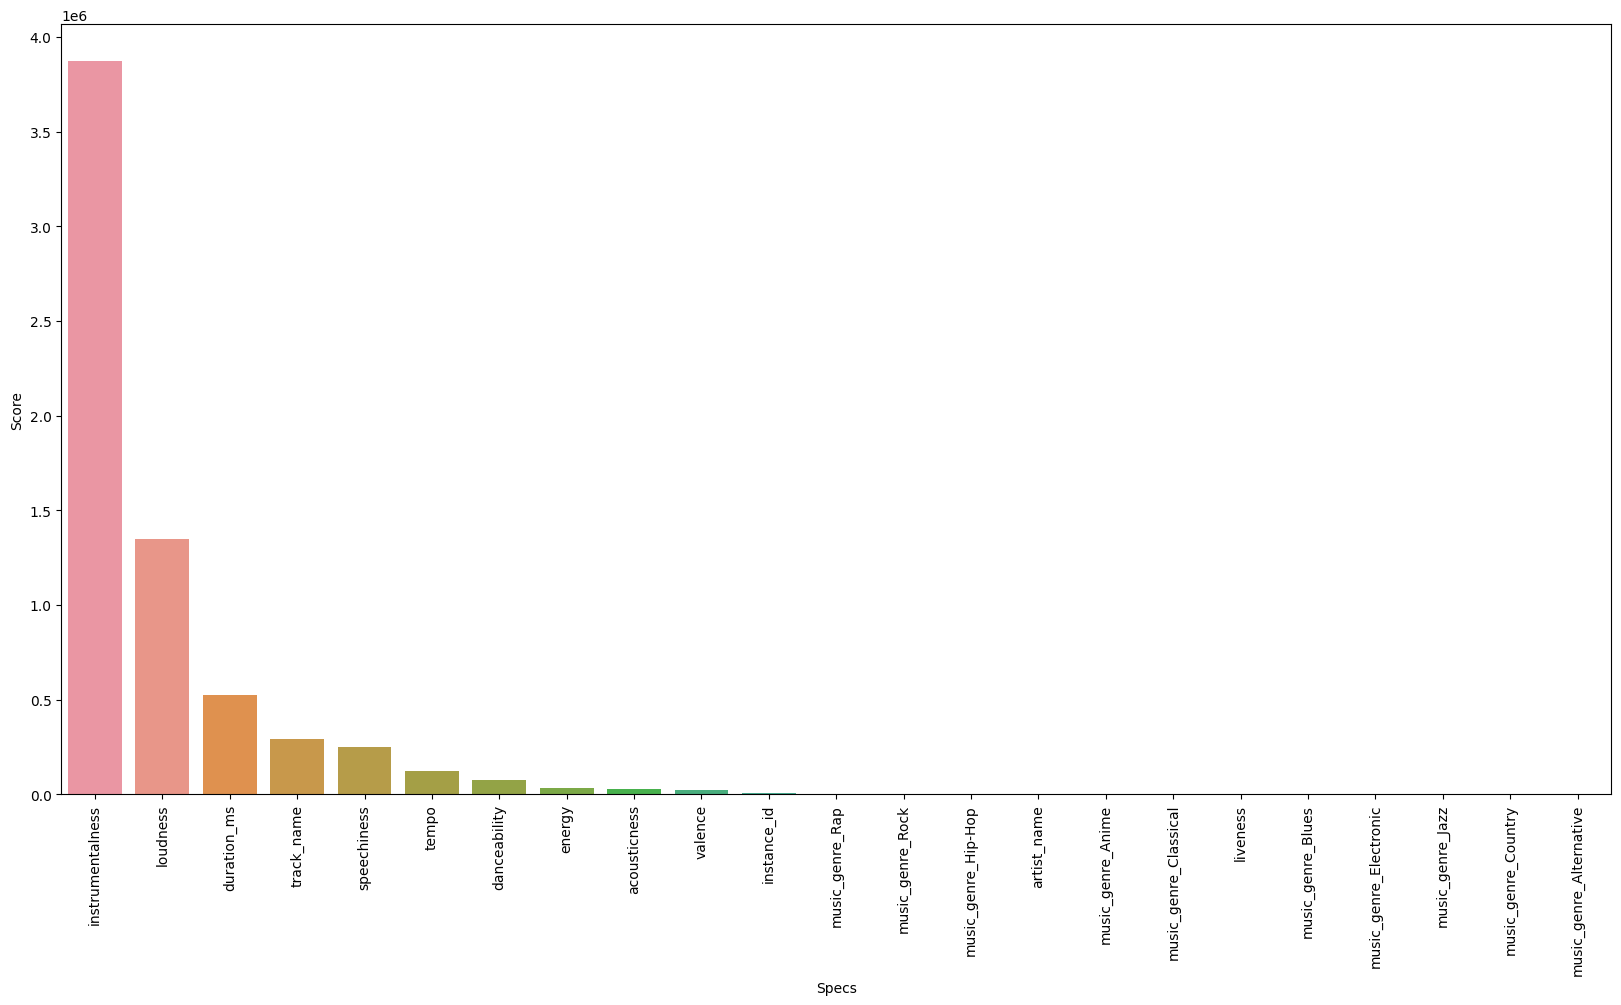

In [14]:
#realizar fischer score para ver que variables son mas importantes

#se implementa fischer score para ver la relevancia de las columnas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

X = music_genre.drop('hit', axis=1)
y = music_genre['hit']

#todas las variables ya son numericas
#todas las variables ya son numericas
labelencoder = LabelEncoder()
for column in X.columns:
    X[column] = labelencoder.fit_transform(X[column])
    
#seleccion de las 10 mejores variables
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))
#ordenar de mejor a peor relevancia
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores = featureScores.reset_index(drop=True)
#se grafica la relevancia de las variables
plt.figure(figsize=(20, 10))
sns.barplot(x='Specs', y='Score', data=featureScores)
plt.xticks(rotation=90)  # Add this line to rotate x axis labels
plt.show()


In [17]:
df = music_genre.copy()

#dropear las columnas "track_name", "artist_name", "instance_id" y "liveness" ya que no se utilizaran

#df.drop(['track_name', 'artist_name', 'instance_id', 'liveness'], axis=1, inplace=True)
df.drop(['track_name'], axis=1, inplace=True)

#vectorizar el texto de artist name y track name con bow

from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer para 'artist_name'
cv_artist = CountVectorizer()
artist_name_bow = cv_artist.fit_transform(df['artist_name'])
artist_name_bow = pd.DataFrame(artist_name_bow.toarray(), columns=cv_artist.get_feature_names_out())

# Concatenar los dataframes
df = pd.concat([df, artist_name_bow], axis=1)

# Eliminar las columnas originales
df.drop(['artist_name'], axis=1, inplace=True)




Se puede concluir que hasta la columna energy es relevante para la predicción de si es un hit o no. Por lo que con la información anterior y el fischer score se puede colcuir que no es necesario incluir las columnas desde valence hacia la derecha. Si se es más especificos podríamos dejar desde instrumentalness hasta acousticness que alcanzan a ser percibidas en el gráfico.

TypeError: Axes.boxplot() got an unexpected keyword argument 'legend'

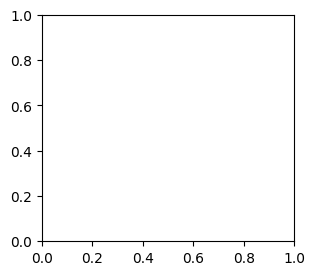

In [16]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='hit', y=col, data=music_genre, hue='hit', palette="viridis", legend=False)
    plt.title(f'{col} vs Hit', fontsize=14)
    plt.xlabel('Hit', fontsize=12)
    plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.suptitle('Boxplots de Variables Numéricas vs Éxito', fontsize=16, y=1.02)
plt.show()


Es demasiado pesado una vez vectorizado, en vola lo hice mal, pero eso.

Modelo MLP

In [19]:
#split con 20% test

from sklearn.model_selection import train_test_split

X = df.drop('hit', axis=1)
y = df['hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from keras.models import Model
from keras.layers import Dense, Embedding, Input
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

#los datos ya estan preprocesados y no hay que tokenizarlos porque no es texto.
classes = np.unique(y_train)

inputs = Input(shape=(X_train.shape[1],))
dense1 = Dense(512, activation="relu")(inputs)
dense2 = Dense(256, activation="relu")(dense1)
dense3 = Dense(len(classes), activation="sigmoid")(dense2)

outputs = dense3

model_mlp = Model(inputs=inputs, outputs=outputs)

model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_mlp.summary()

#print accuracy
def print_accuracy(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

#usar funcion

y_pred = model_mlp.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print_accuracy(y_test, y_pred)



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7570)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,876,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10809)          │     2,777,913 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,785,593 (25.88 MB)

 Trainable params: 6,785,593 (25.88 MB)

 Non-trainable params: 0 (0.00 B)

302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [ ]:
def vectorize(A):
    if A == 1:
        return [0, 1]
    else:
        return [1, 0]
    
    
y_train_vec =  np.array([vectorize(y) for y in y_train])

In [ ]:
history = model_mlp.fit(X_train, y_train_vec, epochs=20, batch_size=64)

Epoch 1/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8557 - loss: 0.3293
Epoch 2/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8543 - loss: 0.2992
Epoch 3/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8522 - loss: 0.3022
Epoch 4/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8493 - loss: 0.3032
Epoch 5/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8548 - loss: 0.2971
Epoch 6/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.2941
Epoch 7/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8534 - loss: 0.2988
Epoch 8/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8540 - loss: 0.2978
Epoch 9/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8545 - loss: 0.2955
Epoch 10/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8570 - loss: 0.2894
Epoch 11/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8536 - loss: 0.2947
Epoch 12/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

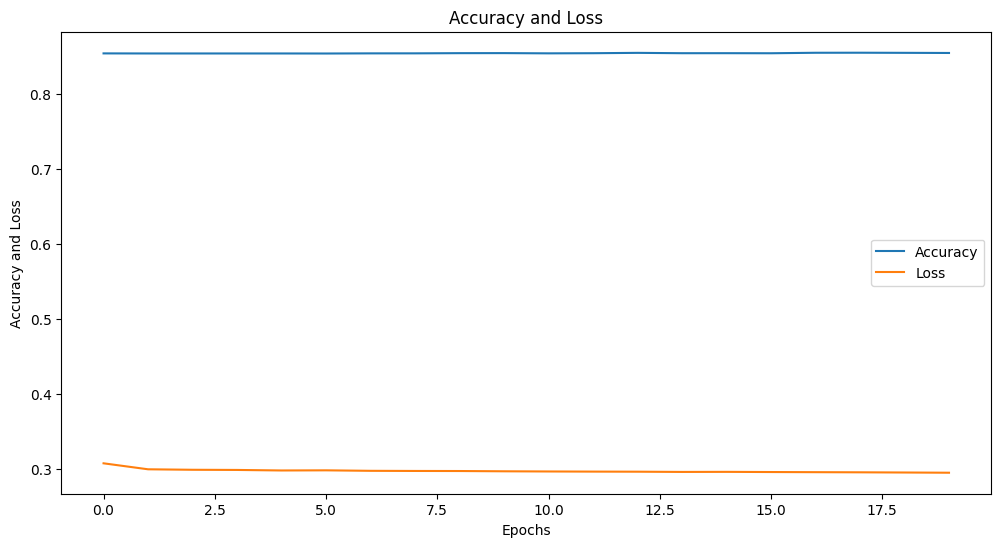

In [ ]:


#graficar la perdida y la precision

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.legend()
plt.show()

